In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for plotting QQ plot
import scipy.stats as sts
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv("concrete_data.csv")

In [4]:
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.shape

(1030, 9)

In [7]:
df.isnull().sum()


Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


We are having min value=0 for blast furnanace ,Fly Ash and Superplasticizer)

In [9]:
X=df.drop(columns=['Strength'])
y=df.iloc[:,-1]

In [10]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.shape

(824, 8)

In [12]:
#Applying Regression without transformation

In [13]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
r2_score(y_test,y_predict)

0.6275531792314851

In [14]:
#Cross-validation
lr=LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.4609940491662865

In [15]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


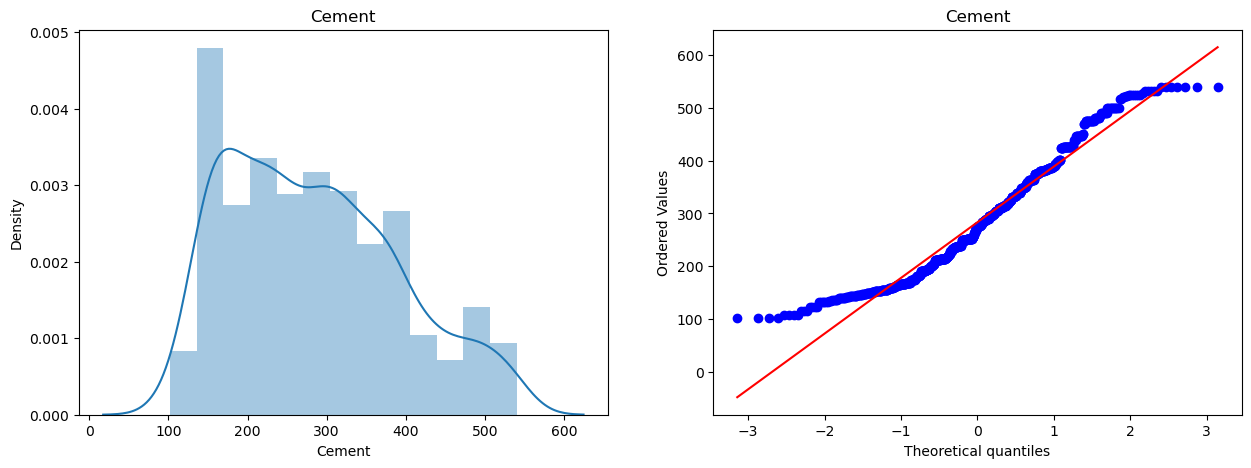

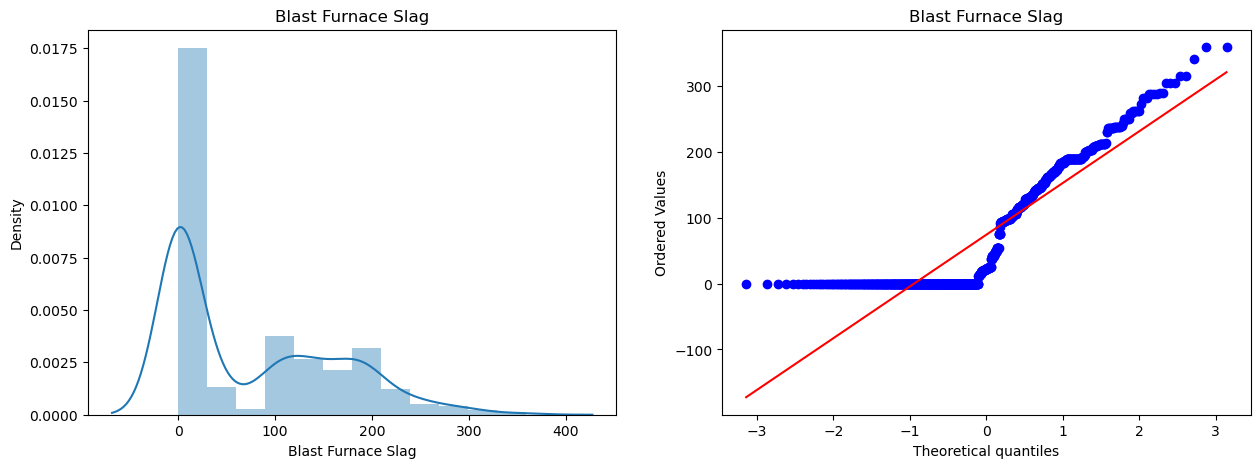

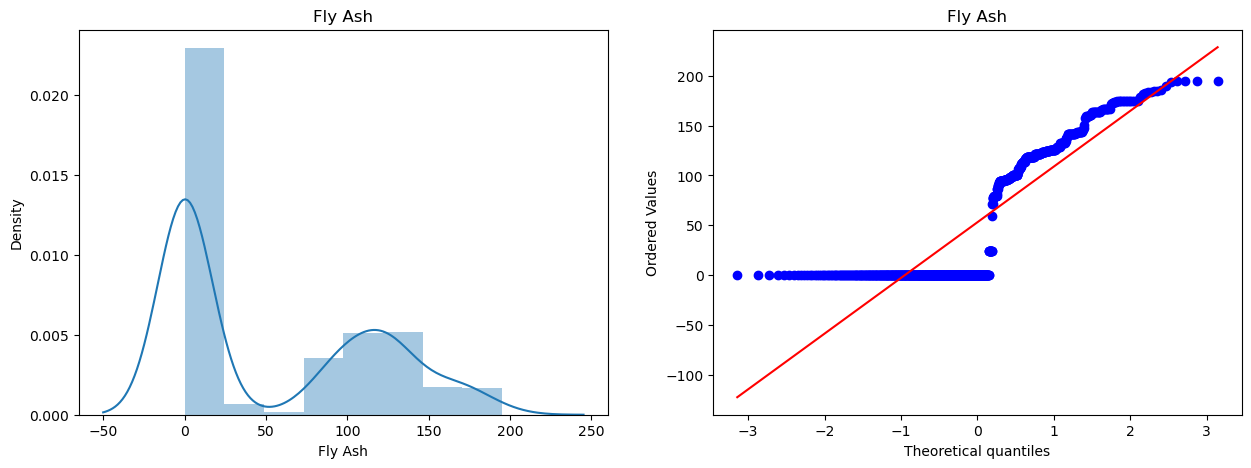

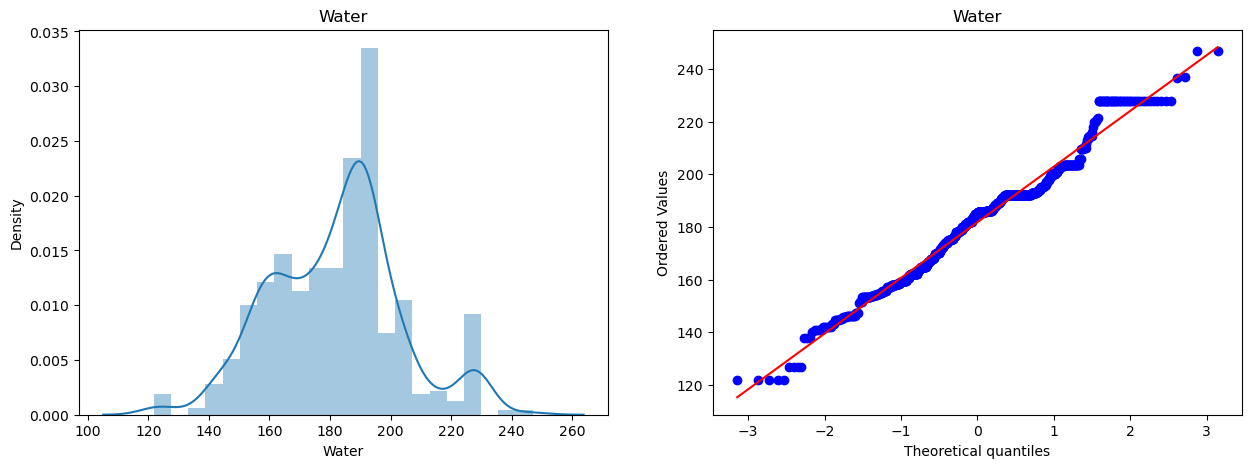

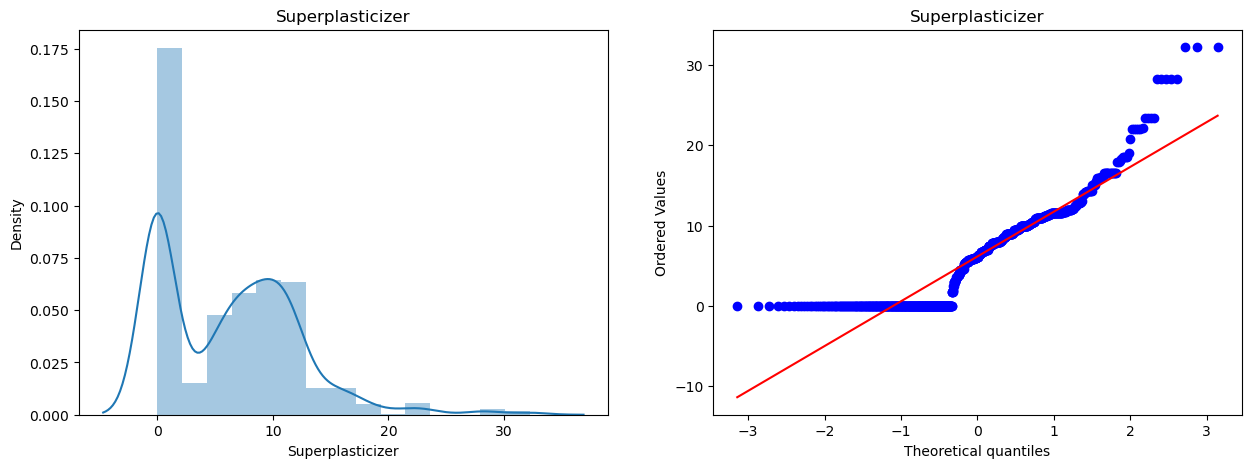

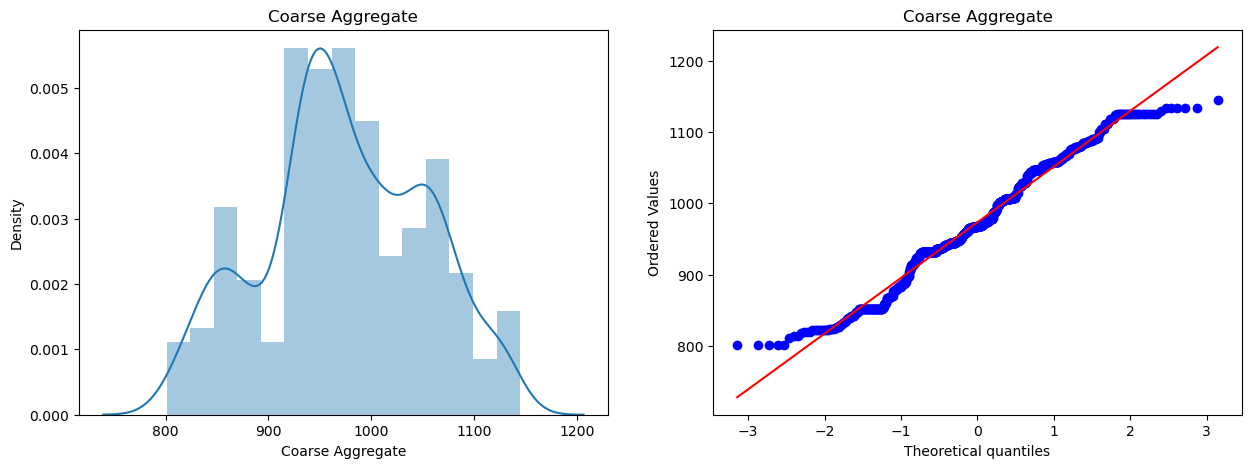

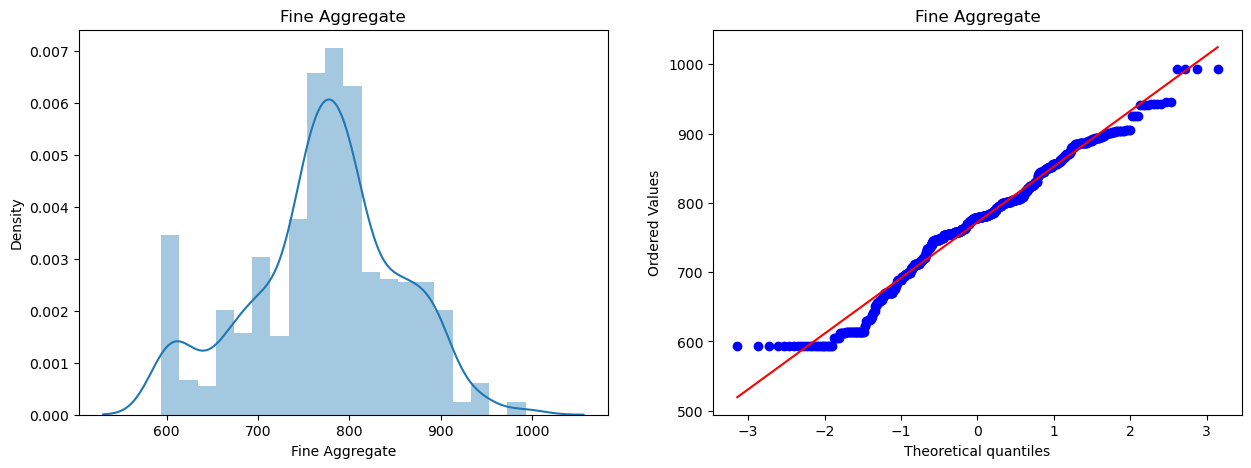

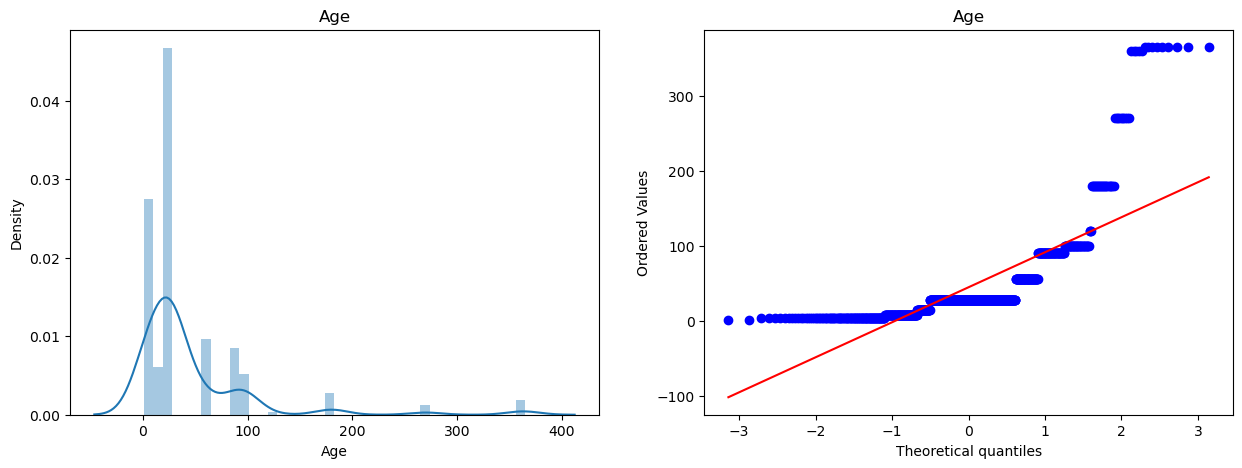

In [16]:
#plotting the plots without any transformation
for col in X_train.columns:
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sts.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)
    

In [17]:
#Applying Box=Cox
pt=PowerTransformer(method='box-cox')
X_train_transformed=pt.fit_transform(X_train+0.000001)
X_test_transformed=pt.fit_transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box-cox_lambdas':pt.lambdas_})

,cols,box-cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [18]:
lr.fit(X_train_transformed,y_train)
y_predict2=lr.predict(X_test_transformed)
r2_score(y_test,y_predict2)

0.8055321005305189

In [19]:
#Use cross val score
lr=LinearRegression()
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537939913376

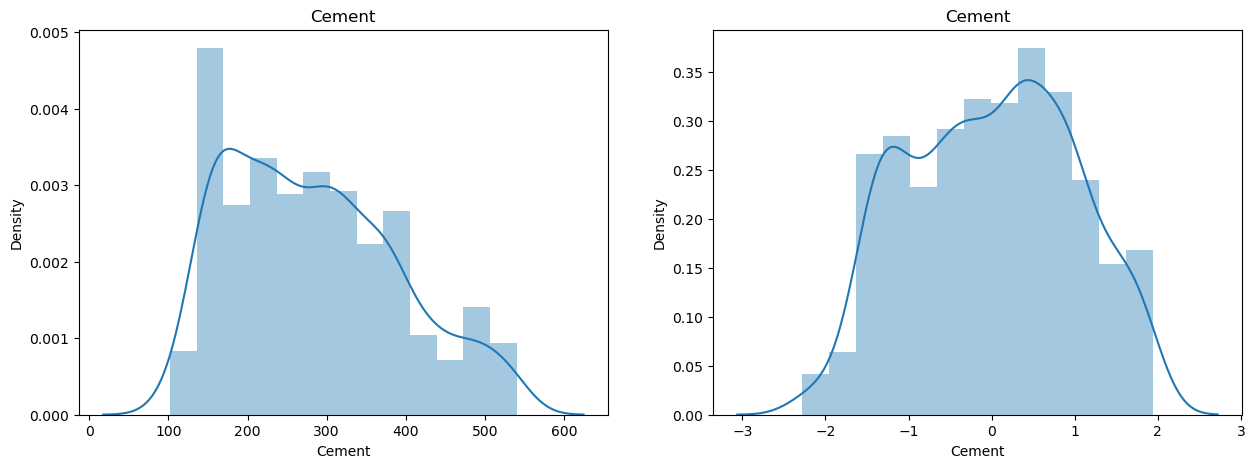

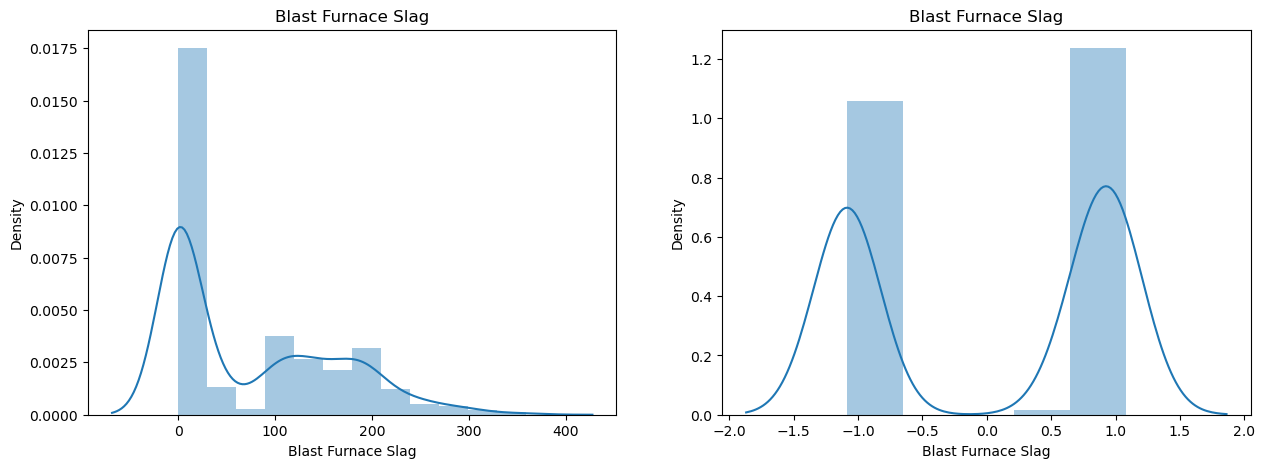

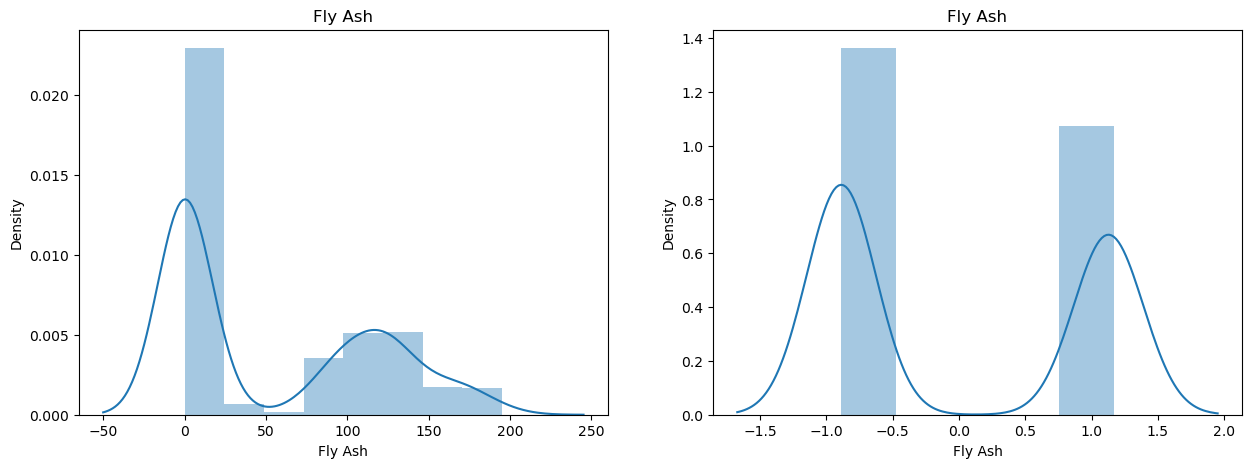

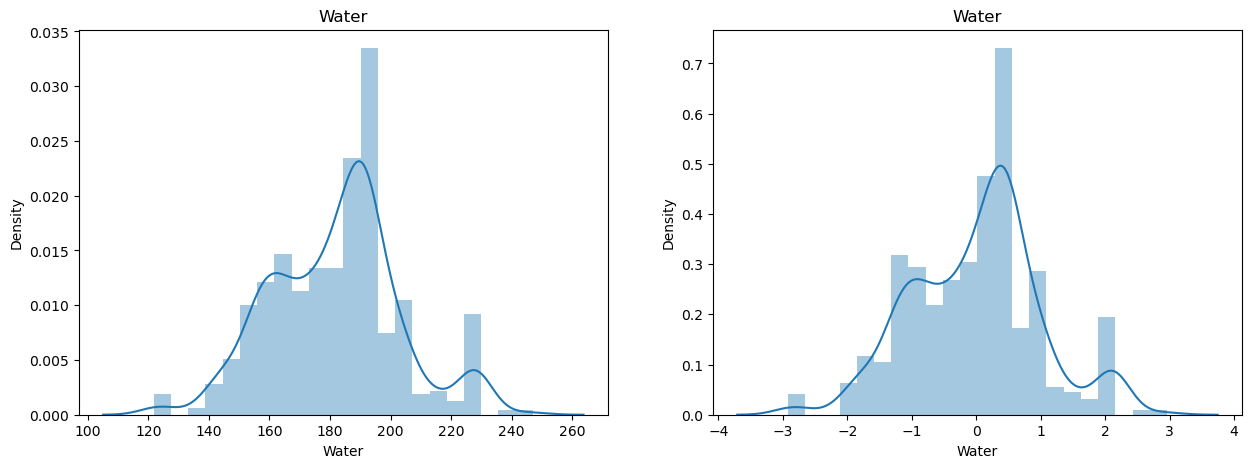

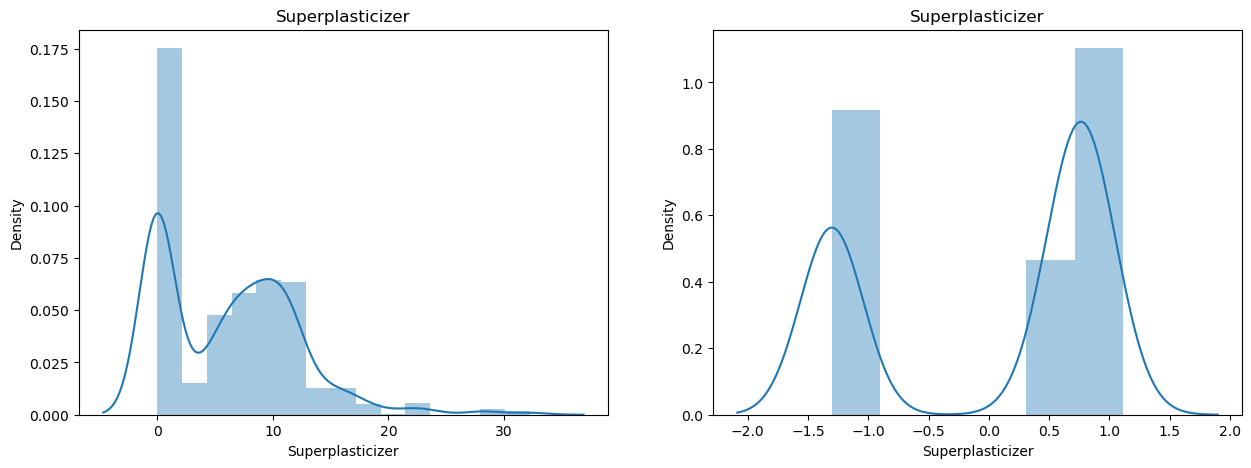

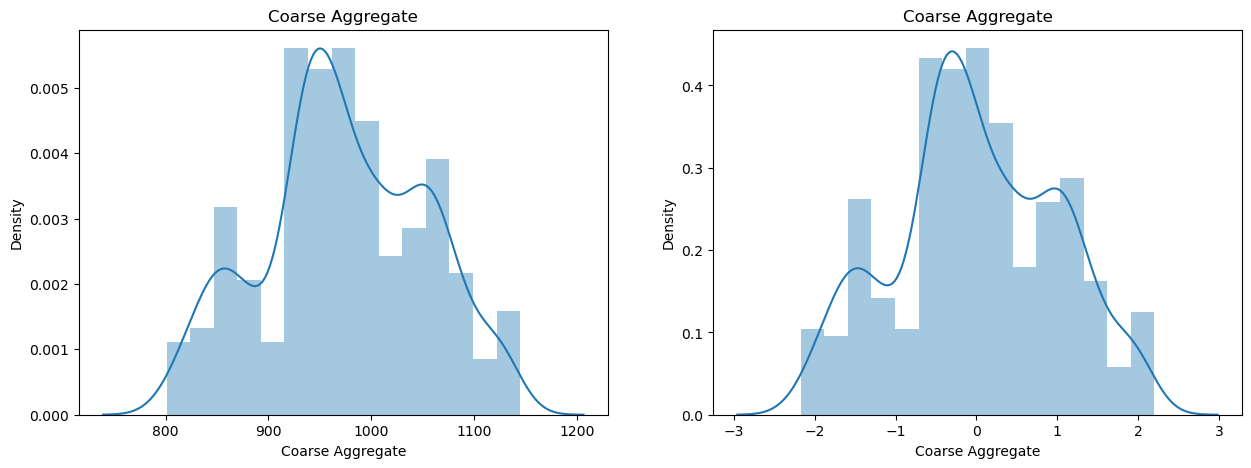

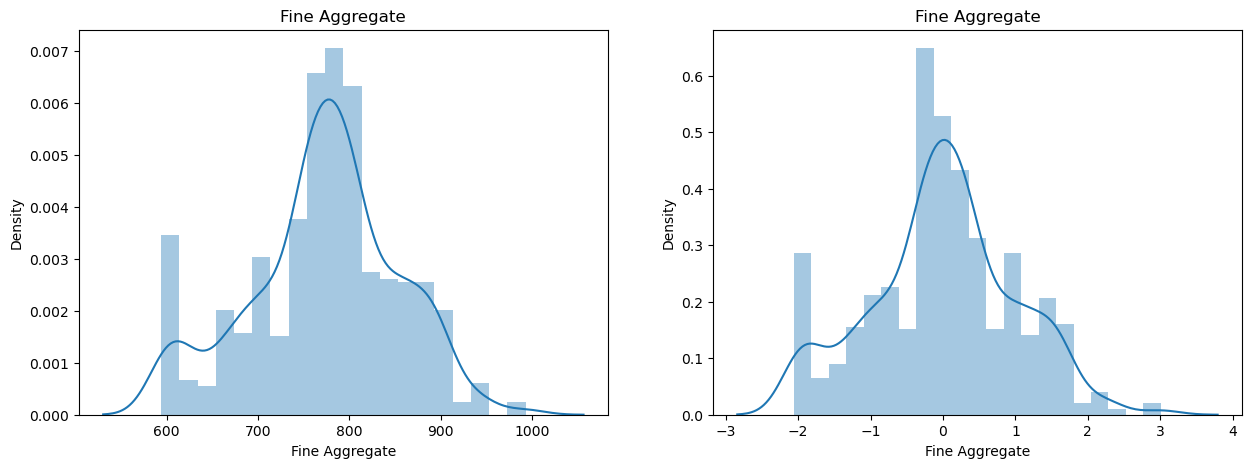

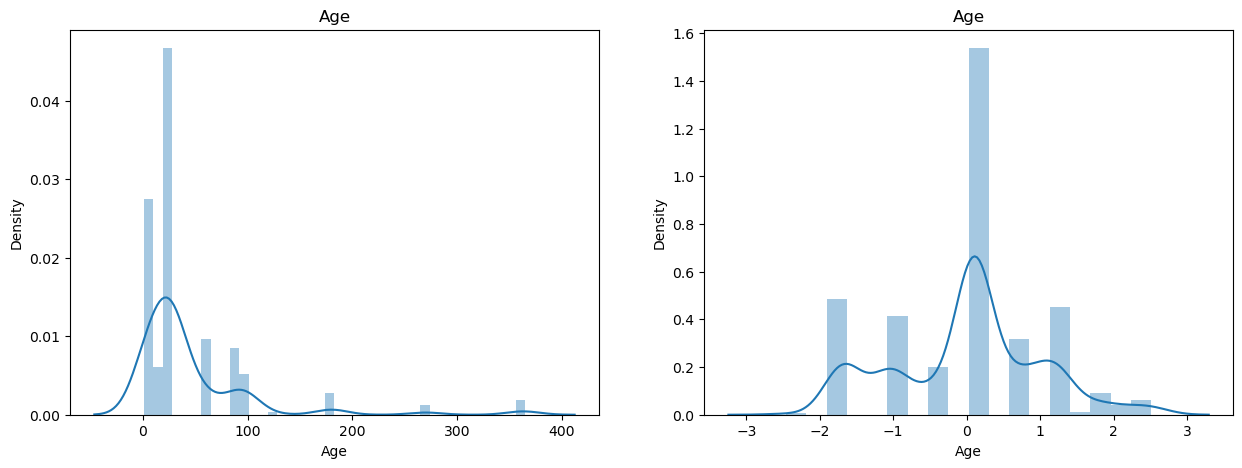

In [20]:
#Before and After comparsion for Box-cox plot
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train_transformed.columns:
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

In [21]:
pt2=PowerTransformer(method='yeo-johnson')
X_train_transformed2=pt2.fit_transform(X_train)
X_test_transformed2=pt2.transform(X_test)
pd.DataFrame({'col':X_train.columns,'yeo_johnson_lambdas':pt.lambdas_})

,col,yeo_johnson_lambdas
0,Cement,0.172271
1,Blast Furnace Slag,0.022924
2,Fly Ash,-0.028797
3,Water,0.809568
4,Superplasticizer,0.087911
5,Coarse Aggregate,1.129168
6,Fine Aggregate,1.829625
7,Age,0.048975


In [22]:
lr.fit(X_train_transformed2,y_train)
y_predict3=lr.predict(X_test_transformed2)
r2_score(y_test,y_predict3)

0.8161906513339304

In [23]:
#Cross-Verifying
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625141500862

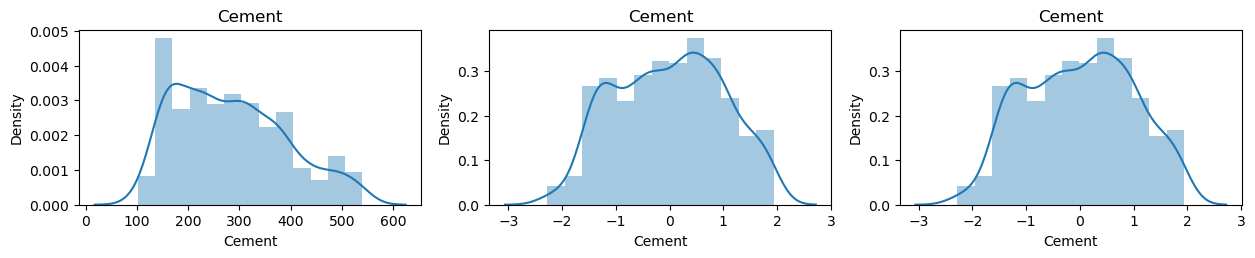

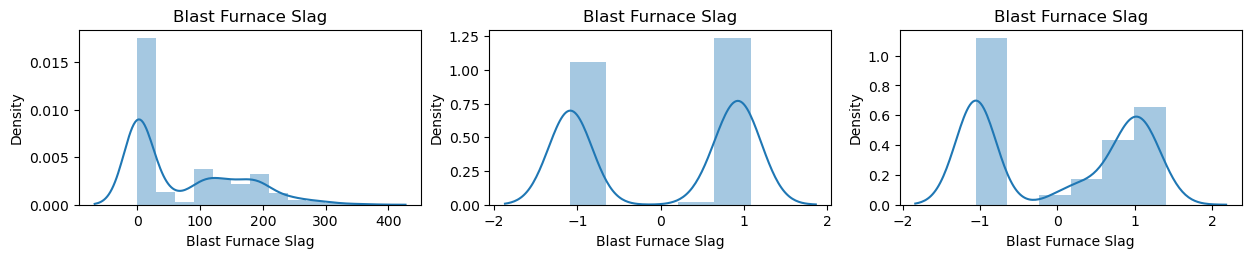

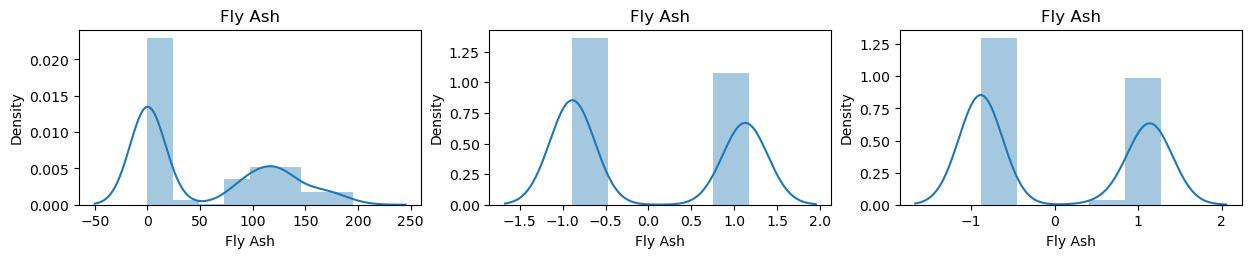

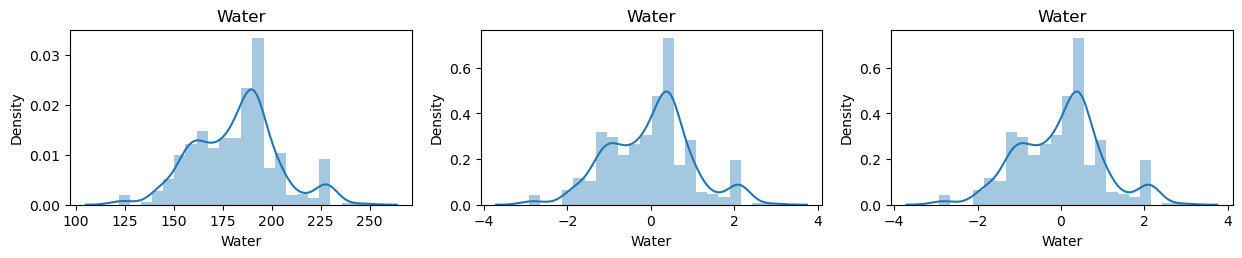

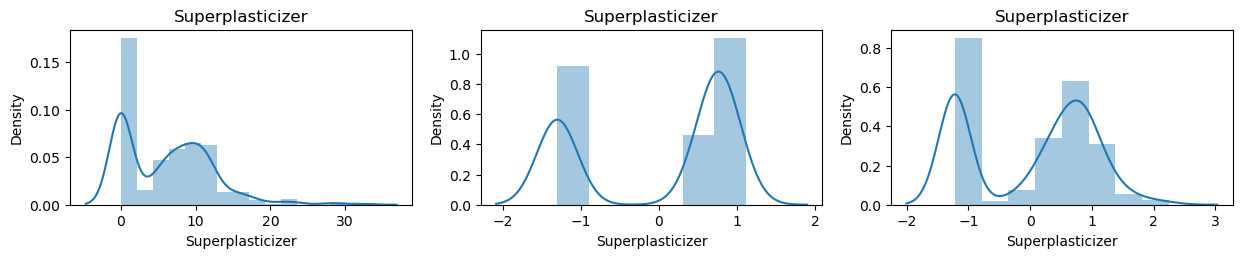

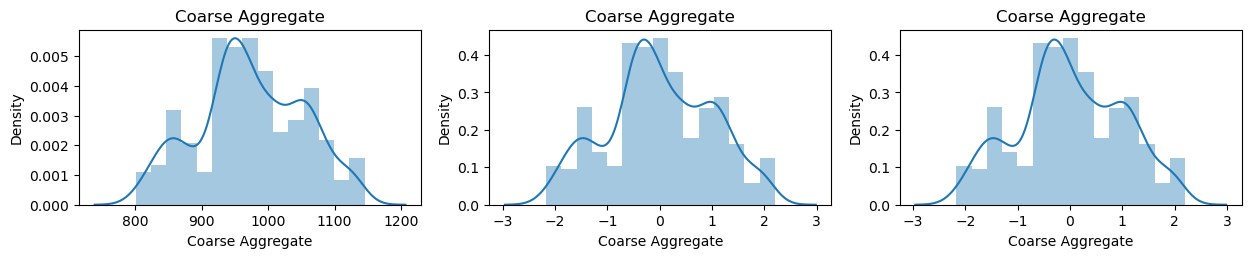

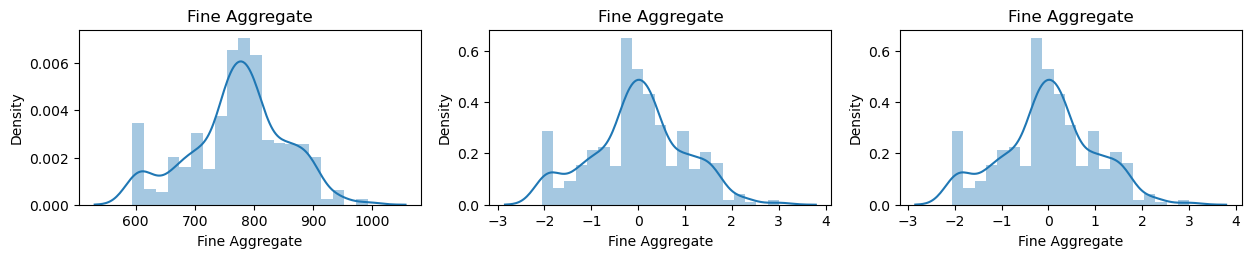

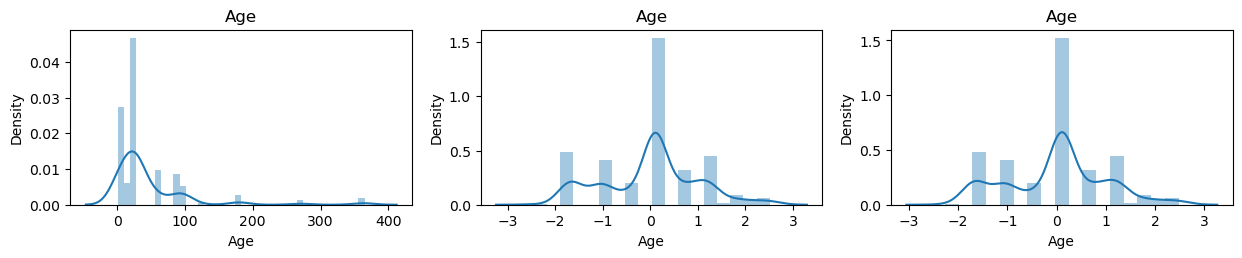

In [30]:
#After and Before Yeo-Johnson
X_train_transformed2=pd.DataFrame(X_train_transformed2,columns=X_train.columns)
for col in X_train_transformed2.columns:
    plt.figure(figsize=(15,5))
    plt.subplot(2,3,1)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(2,3,2)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.subplot(2,3,3)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)
    

In [32]:
pd.DataFrame({'col':X_train.columns,'box-cox':pt.lambdas_,'yeo_johnson_lambdas':pt.lambdas_})

,col,box-cox,yeo_johnson_lambdas
0,Cement,0.169544,0.169544
1,Blast Furnace Slag,0.016633,0.016633
2,Fly Ash,-0.136480,-0.136480
3,Water,0.808438,0.808438
4,Superplasticizer,0.264160,0.264160
5,Coarse Aggregate,1.129395,1.129395
6,Fine Aggregate,1.830763,1.830763
7,Age,0.001771,0.001771
